___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Supervised Learning Capstone Project - Tree Methods Focus 



## Make sure to review the introduction video to understand the 3 ways of approaching this project exercise!

----

**Ways to approach the project:**
   1. Open a new notebook, read in the data, and then analyze and visualize whatever you want, then create a predictive model.
   2. Use this notebook as a general guide, completing the tasks in bold shown below.
   3. Skip to the solutions notebook and video, and treat project at a more relaxing code along walkthrough lecture series.

------
------

## GOAL: Create a model to predict whether or not a customer will Churn .

----
----


## Complete the Tasks in Bold Below!

## Part 0: Imports and Read in the Data

**TASK: Run the filled out cells below to import libraries and read in your data. The data file is "Telco-Customer-Churn.csv"**

In [2]:
# RUN THESE CELLS TO START THE PROJECT!
import numpy as np
import polars as pl
import polars.selectors as cs
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from babel.dates import match_skeleton

In [3]:
df = pl.read_csv('../../DATA/Telco-Customer-Churn.csv')

In [4]:
df.head()

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone service""","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",29.85,29.85,"""No"""
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,"""No"""
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Mailed check""",53.85,108.15,"""Yes"""
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer (automatic)""",42.3,1840.75,"""No"""
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",70.7,151.65,"""Yes"""


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [18]:
# CODE HERE

B
i64
6


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [137]:
# CODE HERE

In [5]:
df.describe()

statistic,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
str,str,str,f64,str,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""count""","""7032""","""7032""",7032.0,"""7032""","""7032""",7032.0,"""7032""","""7032""","""7032""","""7032""","""7032""","""7032""","""7032""","""7032""","""7032""","""7032""","""7032""","""7032""",7032.0,7032.0,"""7032"""
"""null_count""","""0""","""0""",0.0,"""0""","""0""",0.0,"""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,"""0"""
"""mean""",null,null,0.1624,null,null,32.421786,null,null,null,null,null,null,null,null,null,null,null,null,64.798208,2283.300441,null
"""std""",null,null,0.368844,null,null,24.54526,null,null,null,null,null,null,null,null,null,null,null,null,30.085974,2266.771362,null
"""min""","""0002-ORFBO""","""Female""",0.0,"""No""","""No""",1.0,"""No""","""No""","""DSL""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""No""","""Bank transfer (automatic)""",18.25,18.8,"""No"""
"""25%""",null,null,0.0,null,null,9.0,null,null,null,null,null,null,null,null,null,null,null,null,35.6,401.5,null
"""50%""",null,null,0.0,null,null,29.0,null,null,null,null,null,null,null,null,null,null,null,null,70.35,1397.65,null
"""75%""",null,null,0.0,null,null,55.0,null,null,null,null,null,null,null,null,null,null,null,null,89.85,3794.5,null
"""max""","""9995-HOTOH""","""Male""",1.0,"""Yes""","""Yes""",72.0,"""Yes""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Yes""","""Two year""","""Yes""","""Mailed check""",118.75,8684.8,"""Yes"""


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [6]:
# CODE HERE
pl.DataFrame({
    'Feature': df.columns,
    'Null Values': df.null_count().transpose(),
})

Feature,Null Values
str,u32
"""customerID""",0
"""gender""",0
"""SeniorCitizen""",0
"""Partner""",0
"""Dependents""",0
…,…
"""PaperlessBilling""",0
"""PaymentMethod""",0
"""MonthlyCharges""",0


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [7]:
# CODE HERE
df.get_column('Churn').value_counts().plot.bar(x='Churn', y='count')

alt.Chart(...)

<Axes: xlabel='Churn', ylabel='count'>

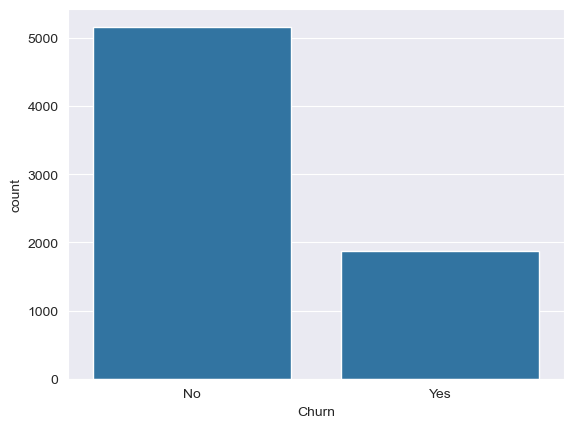

In [8]:
sns.countplot(data=df, x='Churn')

<img src='fig1.png' >

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

In [52]:
# CODE HERE

<Axes: xlabel='Churn', ylabel='TotalCharges'>

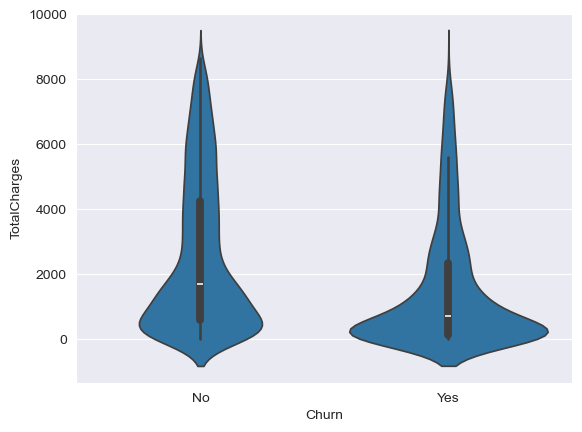

In [9]:
sns.violinplot(data=df, x='Churn', y='TotalCharges')

<img src='fig2.png' >

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

<Axes: xlabel='Contract', ylabel='TotalCharges'>

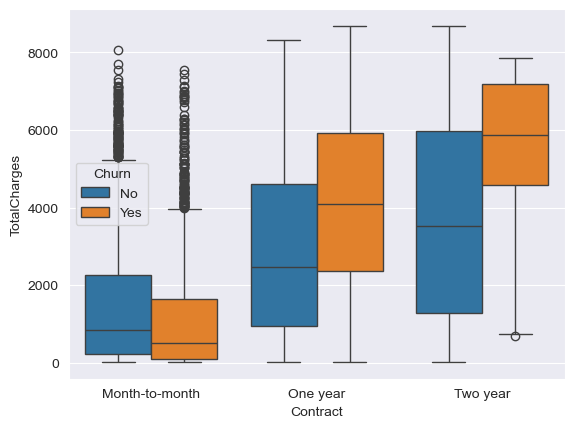

In [54]:
#CODE HERE

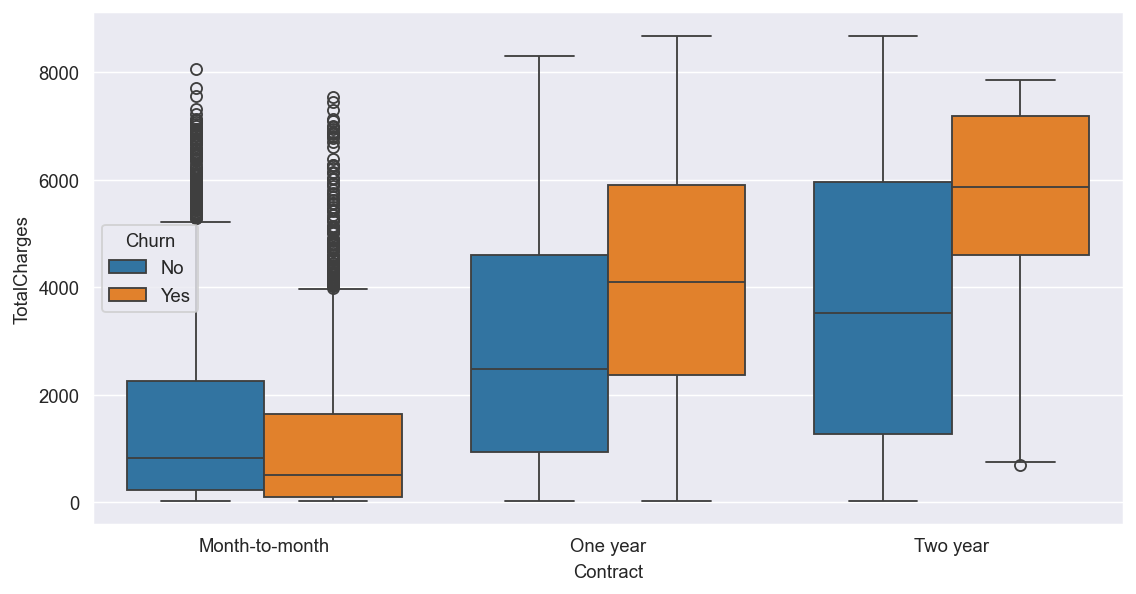

In [10]:
plt.figure(figsize=(10,5), dpi=133)
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.show()

<img src='fig3.png' >

**TASK: Create a bar plot showing the correlation of the following features to the class label. Keep in mind, for the categorical features, you will need to convert them into dummy variables first, as you can only calculate correlation for numeric features.**

    ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
     'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

***Note, we specifically listed only the features above, you should not check the correlation for every feature, as some features have too many unique instances for such an analysis, such as customerID***

In [58]:
#CODE HERE

In [66]:
df.columns

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [11]:
corr_df = df.select(cs.exclude('customerID')).to_dummies().corr()

In [12]:
corr_df = pl.DataFrame({
    'Feature': corr_df.columns,
    'Churn_Yes': corr_df['Churn_Yes'].sort()
})[1:-1]

In [13]:
corr_df

Feature,Churn_Yes
str,f64
"""gender_Male""",-0.301552
"""SeniorCitizen_0""",-0.227578
"""SeniorCitizen_1""",-0.227578
"""Partner_No""",-0.227578
"""Partner_Yes""",-0.227578
…,…
"""TotalCharges_998.1""",0.301455
"""TotalCharges_999.45""",0.307463
"""TotalCharges_999.8""",0.336877


Contract_Two year                         -0.301552
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
TechSupport_No internet service           -0.227578
DeviceProtection_No internet service      -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
InternetService_No                        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

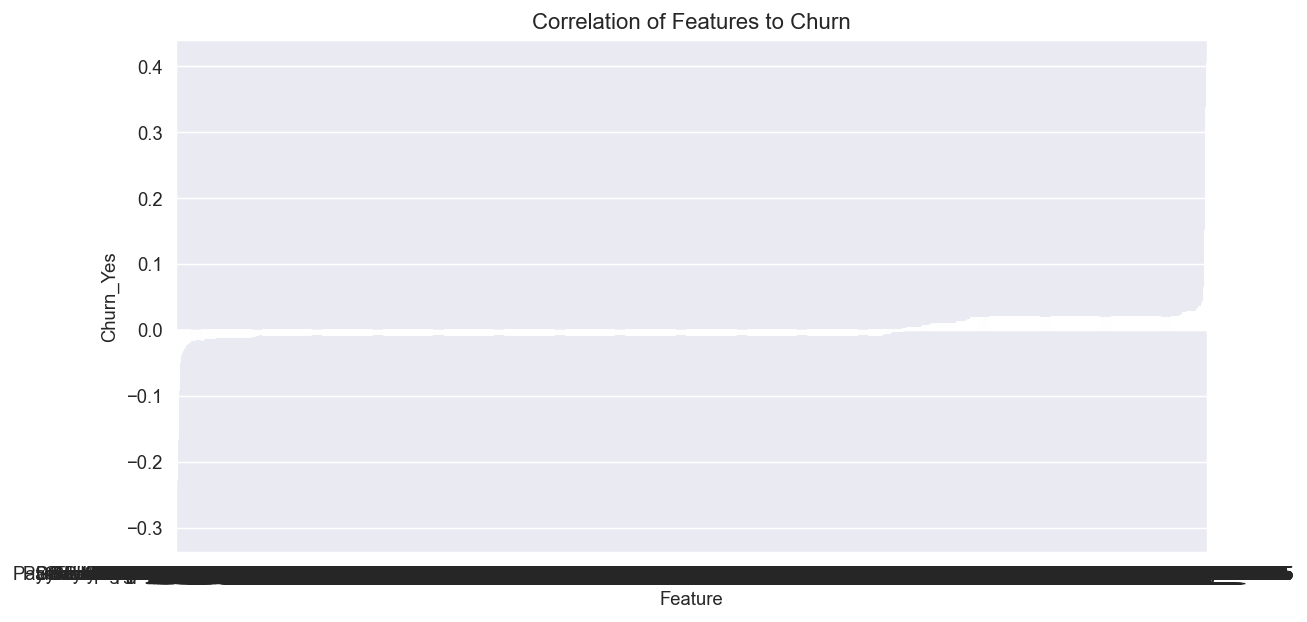

In [14]:
plt.figure(figsize=(10,5), dpi=133)
sns.barplot(data=corr_df, x='Feature', y='Churn_Yes')
plt.title('Correlation of Features to Churn')
plt.show()

<img src='figbar.png'>

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [16]:
# CODE HERE

In [17]:
df.select(pl.col('Contract')).unique()

Contract
str
"""Two year"""
"""Month-to-month"""
"""One year"""


**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

In [21]:
#CODE HERE

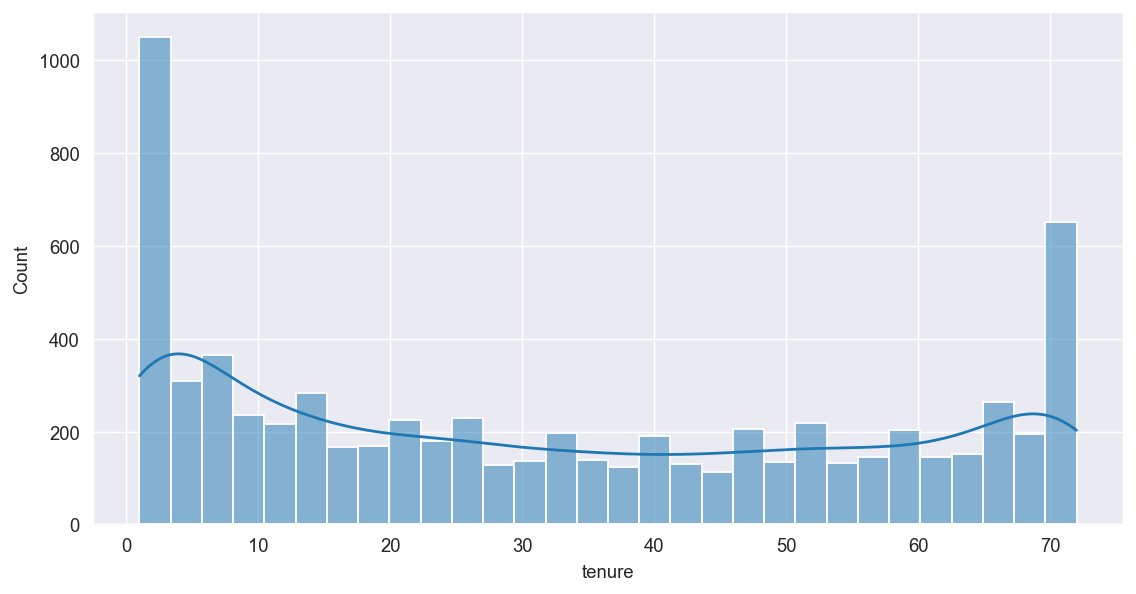

In [22]:
plt.figure(figsize=(10,5), dpi=133)
sns.histplot(data=df, x='tenure', bins=30, kde=True)
plt.show()

<img src="fig5.png">

**TASK: Now use the seaborn documentation as a guide to create histograms separated by two additional features, Churn and Contract.**

In [156]:
#CODE HERE

<Figure size 1330x665 with 0 Axes>

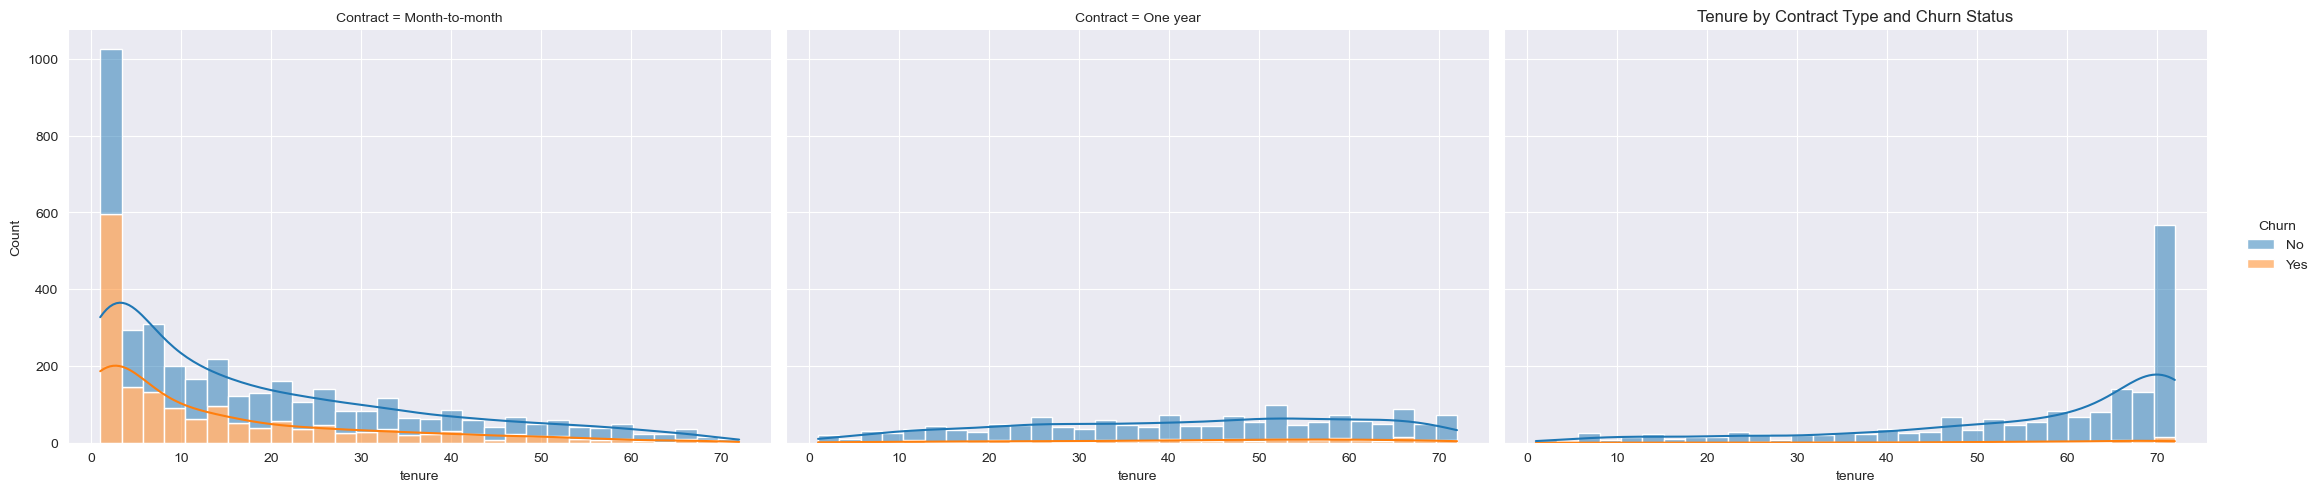

In [30]:
plt.figure(figsize=(10,5), dpi=133)
sns.displot(data=df, x='tenure', col='Contract', hue='Churn', bins=30, kde=True, kind='hist', multiple='stack', legend=True, aspect=1.5)
plt.title('Tenure by Contract Type and Churn Status')
plt.show()

<img src="fig6.png">

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [158]:
#CODE HERE

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

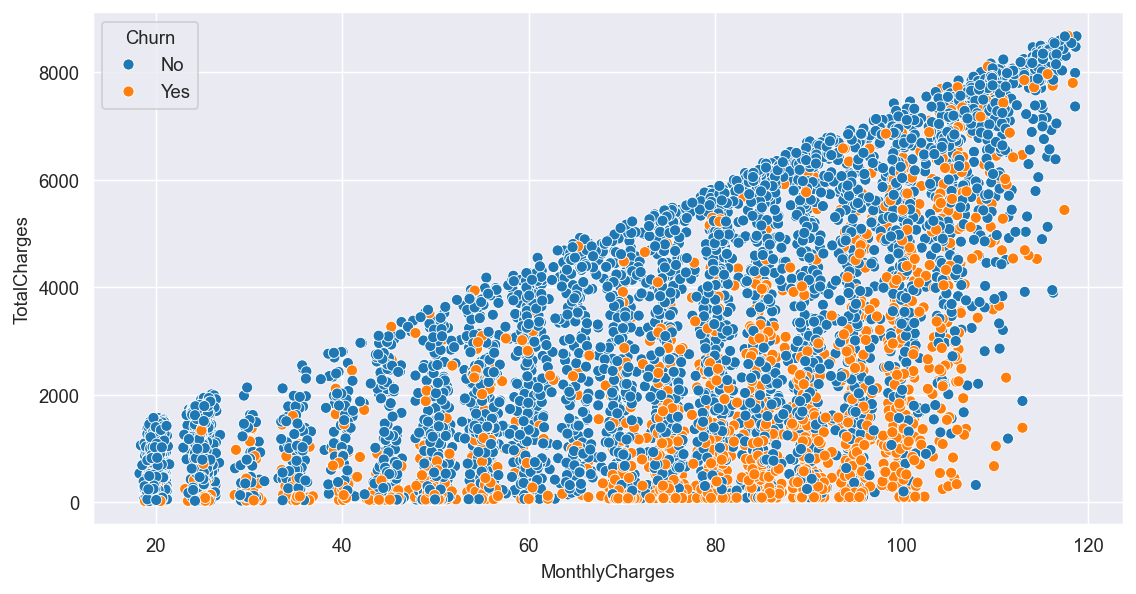

In [33]:
plt.figure(figsize=(10,5), dpi=133)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Churn')
plt.show()

<img src='fig7.png'>

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. For example, the cohort that has had a tenure of 1 month should have a Churn rate of 61.99%. You should have cohorts 1-72 months with a general trend of the longer the tenure of the cohort, the less of a churn rate. This makes sense as you are less likely to stop service the longer you've had it.**

In [161]:
#CODE HERE

In [55]:
churn_tenure = df.group_by(['Churn', 'tenure']).agg(pl.len())

In [56]:
no_churn = churn_tenure.filter(pl.col('Churn') == 'No')

In [59]:
yes_churn = churn_tenure.filter(pl.col('Churn') == 'Yes')

In [70]:
churn_rate = 100 * yes_churn['tenure'] / (no_churn['tenure'] + yes_churn['tenure'])

In [71]:
churn_rate.sort().reverse()

tenure
f64
98.0
95.454545
91.891892
90.410959
88.157895
…
12.5
11.111111
7.246377


**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

In [75]:
#CODE HERE

Churn,tenure,len
str,i64,u32
"""Yes""",40,13
"""Yes""",50,10
"""Yes""",63,4
"""Yes""",42,14
"""Yes""",32,19
…,…,…
"""Yes""",17,26
"""Yes""",4,83
"""Yes""",41,14


<img src='fig9.png'>

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [167]:
# CODE HERE

In [80]:
def tenure_cohort(tenure):
  if tenure <= 12: return '0-12 Months'
  elif tenure <= 24: return '12-24 Months'
  elif tenure <= 48: return '24-48 Months'
  else: return 'Over 48 Months'

In [81]:
df.with_columns(
    pl.col('tenure').map_elements(tenure_cohort, return_dtype=pl.Utf8).alias('Tenure Cohort')
)

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure Cohort
str,str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,str
"""7590-VHVEG""","""Female""",0,"""Yes""","""No""",1,"""No""","""No phone service""","""DSL""","""No""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",29.85,29.85,"""No""","""0-12 Months"""
"""5575-GNVDE""","""Male""",0,"""No""","""No""",34,"""Yes""","""No""","""DSL""","""Yes""","""No""","""Yes""","""No""","""No""","""No""","""One year""","""No""","""Mailed check""",56.95,1889.5,"""No""","""24-48 Months"""
"""3668-QPYBK""","""Male""",0,"""No""","""No""",2,"""Yes""","""No""","""DSL""","""Yes""","""Yes""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Mailed check""",53.85,108.15,"""Yes""","""0-12 Months"""
"""7795-CFOCW""","""Male""",0,"""No""","""No""",45,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""No""","""No""","""One year""","""No""","""Bank transfer (automatic)""",42.3,1840.75,"""No""","""24-48 Months"""
"""9237-HQITU""","""Female""",0,"""No""","""No""",2,"""Yes""","""No""","""Fiber optic""","""No""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",70.7,151.65,"""Yes""","""0-12 Months"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""6840-RESVB""","""Male""",0,"""Yes""","""Yes""",24,"""Yes""","""Yes""","""DSL""","""Yes""","""No""","""Yes""","""Yes""","""Yes""","""Yes""","""One year""","""Yes""","""Mailed check""",84.8,1990.5,"""No""","""12-24 Months"""
"""2234-XADUH""","""Female""",0,"""Yes""","""Yes""",72,"""Yes""","""Yes""","""Fiber optic""","""No""","""Yes""","""Yes""","""No""","""Yes""","""Yes""","""One year""","""Yes""","""Credit card (automatic)""",103.2,7362.9,"""No""","""Over 48 Months"""
"""4801-JZAZL""","""Female""",0,"""Yes""","""Yes""",11,"""No""","""No phone service""","""DSL""","""Yes""","""No""","""No""","""No""","""No""","""No""","""Month-to-month""","""Yes""","""Electronic check""",29.6,346.45,"""No""","""0-12 Months"""


In [94]:
df = df.with_columns(
    pl.when(pl.col('tenure') <= 12).then(pl.lit('0-12 Months'))
    .when(pl.col('tenure') <= 24).then(pl.lit('12-24 Months'))
    .when(pl.col('tenure') <= 48).then(pl.lit('24-48 Months'))
    .when(pl.col('tenure') > 48).then(pl.lit('Over 48 Months'))
    .otherwise(pl.lit('Unknown'))
    .alias('Tenure Cohort')
)

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [171]:
#CODE HERE

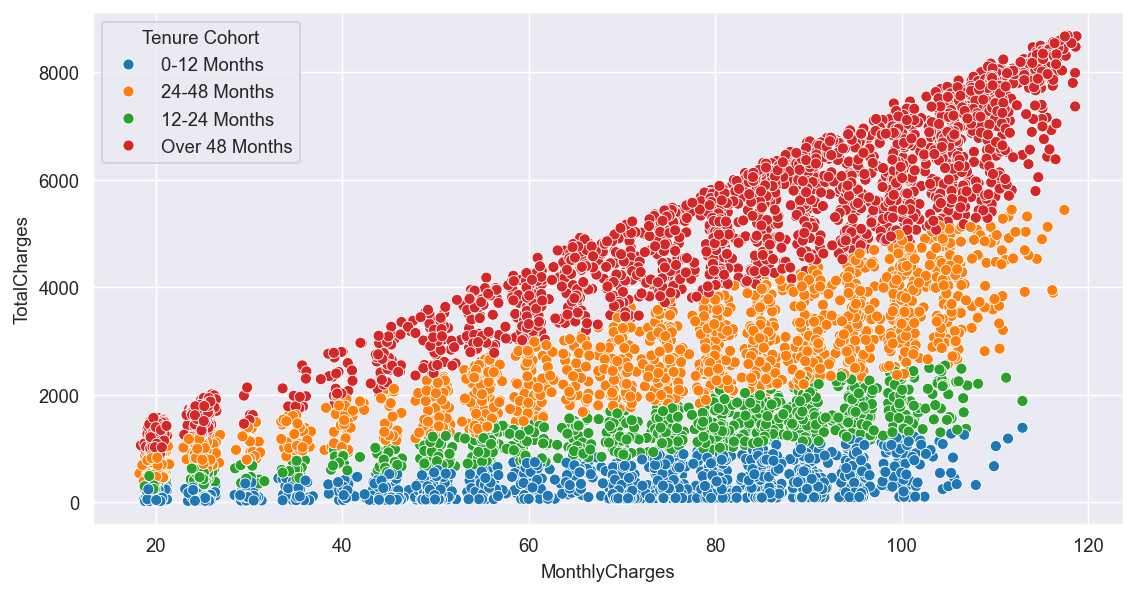

In [96]:
plt.figure(figsize=(10,5), dpi=133)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort')
plt.show()

<img src='fig10.png'>

**TASK: Create a count plot showing the churn count per cohort.**

In [1]:
# CODE HERE

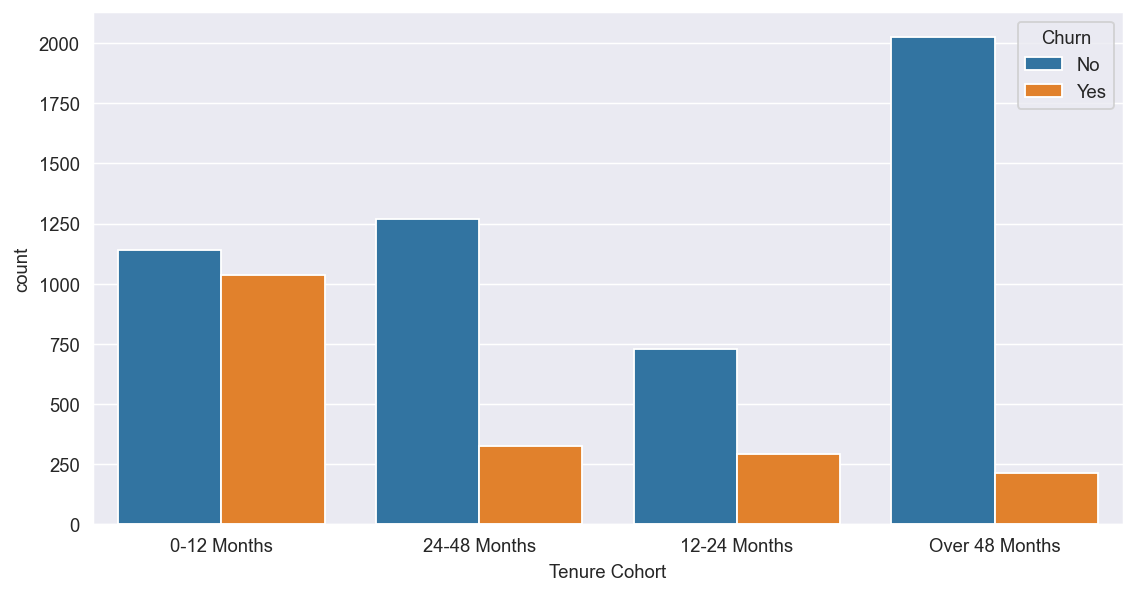

In [97]:
plt.figure(figsize=(10,5), dpi=133)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn')
plt.show()

<img src='cplot.png'>

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

In [174]:
#CODE HERE

<Figure size 1330x665 with 0 Axes>

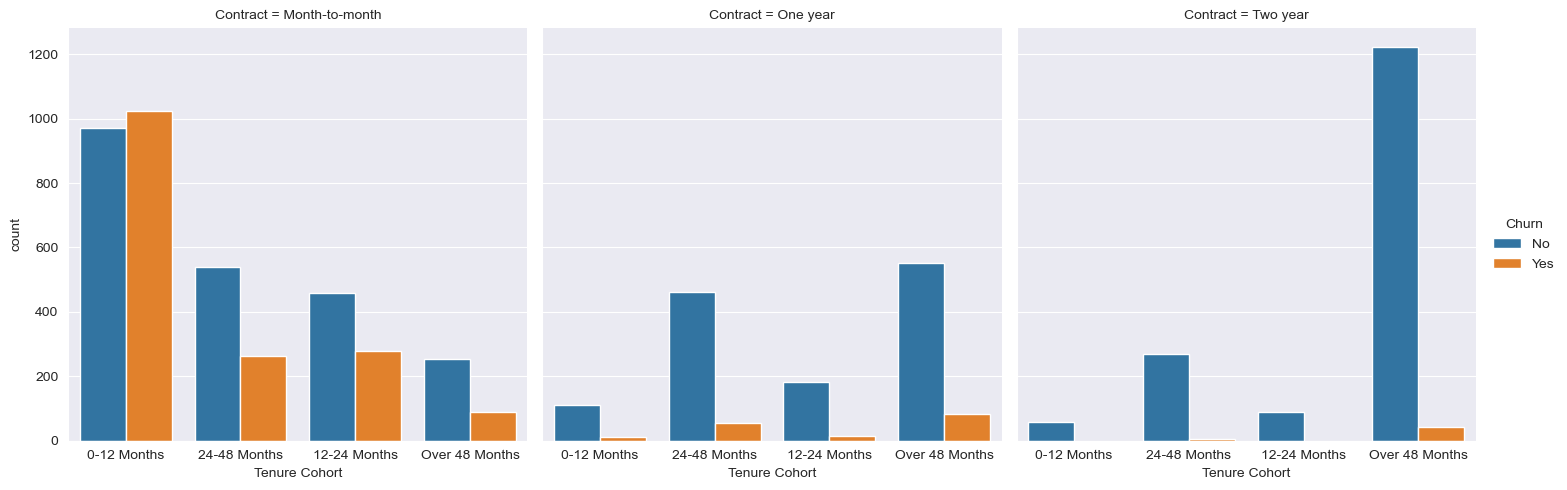

In [100]:
plt.figure(figsize=(10,5), dpi=133)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')
plt.show()

<img src='fig11.png'>

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting. Feel free to add any other supervised learning models to your comparisons!**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [178]:
#CODE HERE

In [114]:
X = df.select(cs.exclude('customerID', 'Churn'))

In [115]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder

In [113]:
# ordinal_encoder = OrdinalEncoder()
#
# X_encoded = ordinal_encoder.fit_transform(X)
# X_encoded = pl.DataFrame(X_encoded, schema=X.schema)

gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Tenure Cohort
str,i64,str,str,i64,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str
"""0.0""",0,"""1.0""","""0.0""",0,"""0.0""","""1.0""","""0.0""","""0.0""","""2.0""","""0.0""","""0.0""","""0.0""","""0.0""","""0.0""","""1.0""","""2.0""",142.0,74.0,"""0.0"""
"""1.0""",0,"""0.0""","""0.0""",33,"""1.0""","""0.0""","""0.0""","""2.0""","""0.0""","""2.0""","""0.0""","""0.0""","""0.0""","""1.0""","""0.0""","""3.0""",497.0,3624.0,"""2.0"""
"""1.0""",0,"""0.0""","""0.0""",1,"""1.0""","""0.0""","""0.0""","""2.0""","""2.0""","""0.0""","""0.0""","""0.0""","""0.0""","""0.0""","""1.0""","""3.0""",435.0,536.0,"""0.0"""
"""1.0""",0,"""0.0""","""0.0""",44,"""0.0""","""1.0""","""0.0""","""2.0""","""0.0""","""2.0""","""2.0""","""0.0""","""0.0""","""1.0""","""0.0""","""0.0""",266.0,3570.0,"""2.0"""
"""0.0""",0,"""0.0""","""0.0""",1,"""1.0""","""0.0""","""1.0""","""0.0""","""0.0""","""0.0""","""0.0""","""0.0""","""0.0""","""0.0""","""1.0""","""2.0""",728.0,674.0,"""0.0"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""1.0""",0,"""1.0""","""1.0""",23,"""1.0""","""2.0""","""0.0""","""2.0""","""0.0""","""2.0""","""2.0""","""2.0""","""2.0""","""1.0""","""1.0""","""3.0""",990.0,3700.0,"""1.0"""
"""0.0""",0,"""1.0""","""1.0""",71,"""1.0""","""2.0""","""1.0""","""0.0""","""2.0""","""2.0""","""0.0""","""2.0""","""2.0""","""1.0""","""1.0""","""1.0""",1339.0,6304.0,"""3.0"""
"""0.0""",0,"""1.0""","""1.0""",10,"""0.0""","""1.0""","""0.0""","""2.0""","""0.0""","""0.0""","""0.0""","""0.0""","""0.0""","""0.0""","""1.0""","""2.0""",137.0,1265.0,"""0.0"""


In [127]:
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = one_hot_encoder.fit_transform(X)
feature_names = pl.Series(one_hot_encoder.get_feature_names_out(X.columns)).to_list()
X_encoded = pl.DataFrame(X_encoded, schema=feature_names)

In [131]:
y = df.select(pl.col('Churn')).to_series()

In [137]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded = pl.Series(y.name, y_encoded)

**TASK: Perform a train test split, holding out 10% of the data for testing. We'll use a random_state of 101 in the solutions notebook/video.**

In [183]:
#CODE HERE

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance. Complete the following tasks:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [140]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [141]:
tree_classifier = DecisionTreeClassifier()

In [148]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
}

In [149]:
grid_model = GridSearchCV(
    estimator=tree_classifier,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5,
    verbose=1,
)

In [150]:
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 44 candidates, totalling 220 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                                       50],
                         'splitter': ['best', 'random']},
             verbose=1)

In [151]:
predictions = grid_model.predict(X_test)

In [152]:
grid_model.best_params_

{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}

In [153]:
grid_model.best_score_

np.float64(0.7846078339546297)

In [154]:
grid_model.score(X_test, y_test)

0.8025568181818182

In [155]:
grid_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [156]:
grid_model.best_estimator_.feature_importances_

array([0.        , 0.        , 0.00146448, ..., 0.        , 0.04807994,
       0.03350014], shape=(8213,))

In [160]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [176]:
confusion_matrix(y_test, predictions)

array([[506,  51],
       [ 88,  59]])

In [173]:
target_labels = label_encoder.classes_

In [172]:
print(classification_report(y_test, predictions, target_names=target_labels))

              precision    recall  f1-score   support

          No       0.85      0.91      0.88       557
         Yes       0.54      0.40      0.46       147

    accuracy                           0.80       704
   macro avg       0.69      0.65      0.67       704
weighted avg       0.79      0.80      0.79       704



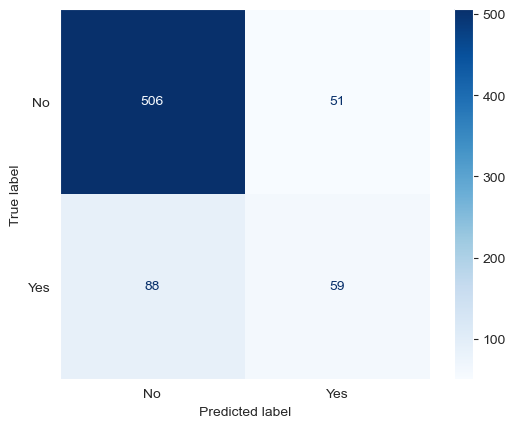

In [171]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', display_labels=target_labels).ax_.grid(False)

<img src='hugetree.png'>

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [259]:
#CODE HERE

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
forest_classifier = RandomForestClassifier()

In [215]:
param_grid = {
    'n_estimators': [10, 20],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'max_features': ['sqrt', 'log2'],
    # 'bootstrap': [True],
    # 'oob_score': [True, False],
    'class_weight': ['balanced', None],
    'n_jobs': [-1],
    # 'verbose': [0],
}

In [216]:
grid_model = GridSearchCV(
    estimator=forest_classifier,
    param_grid=param_grid,
    n_jobs=-1,
    cv=3,
    verbose=1,
)

In [217]:
grid_model.fit(X_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 20], 'n_jobs': [-1]},
             verbose=1)

In [218]:
predictions = grid_model.predict(X_test)

In [219]:
grid_model.score(X_train, y_train)

0.7348293299620733

In [220]:
grid_model.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 10,
 'n_jobs': -1}

In [221]:
grid_model.best_score_

np.float64(0.7283503258808821)

In [222]:
grid_model.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10,
                       n_jobs=-1)

In [223]:
grid_model.best_estimator_.feature_importances_

array([0.00139019, 0.00733329, 0.02231474, ..., 0.00059278, 0.00642555,
       0.10191575], shape=(8213,))

In [224]:
print(classification_report(y_test, predictions, target_names=target_labels, zero_division=0))

              precision    recall  f1-score   support

          No       0.79      1.00      0.88       557
         Yes       0.00      0.00      0.00       147

    accuracy                           0.79       704
   macro avg       0.40      0.50      0.44       704
weighted avg       0.63      0.79      0.70       704



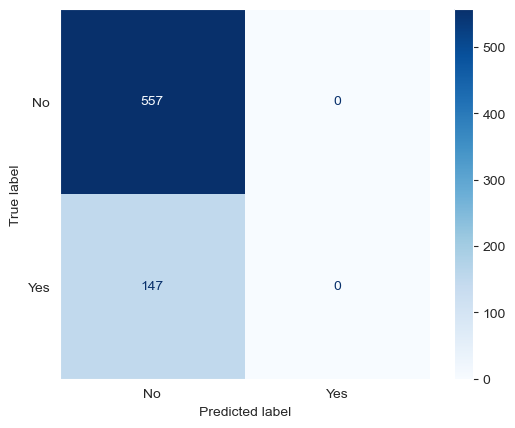

In [206]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', display_labels=target_labels).ax_.grid(False)

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [226]:
#CODE HERE
from sklearn.ensemble import AdaBoostClassifier

In [227]:
ada_boost_classifier = AdaBoostClassifier()

In [228]:
param_grid = {
    'n_estimators': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R'],
}

In [235]:
grid_model = GridSearchCV(
    estimator=ada_boost_classifier,
    param_grid=param_grid,
    n_jobs=-1,
    cv=2,
    verbose=5,
)

In [236]:
grid_model.fit(X_train, y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


KeyboardInterrupt: 

In [ ]:
grid_model.best_params_

In [ ]:
grid_model.best_score_

In [ ]:
grid_model.score(X_train, y_train)

In [ ]:
grid_model.best_estimator_

In [ ]:
grid_model.best_estimator_.feature_importances_

In [ ]:
print(classification_report(y_test, predictions, target_names=target_labels, zero_division=0))

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions, cmap='Blues', display_labels=target_labels).ax_.grid(False)

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



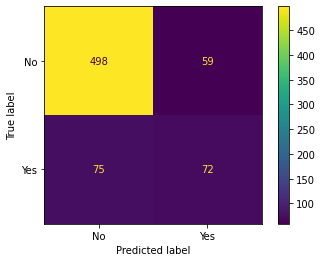

**TASK: Analyze your results, which model performed best for you?**

In [294]:
# With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Great job!